In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
from problem import Domain, Heat_2d_Case1, Heat_2d_Case2, Heat_Diffusion_1T
from my_utils import plot_domain_2d, plot_2d_tri
from scipy.stats import qmc

In [3]:
domain = Domain(domain_range=(0,1,0,1,0,1), domain_shape='box')
print(domain.domain_range)
sampler = qmc.Halton(d=3, scramble=True)
x_pde = domain.sample_domain_uniform(mesh_size=[1001,9,9])
x_test = domain.sample_domain_uniform(mesh_size=[1001,65,65])
x_bd = domain.sample_nd_mesh_bd(mesh_vec=[1001,9,9])
x_bd = domain.shift2range(x_bd)

x_ic = x_bd[81:162]
x_bd = x_bd[162:]
print(x_pde.shape)
print(x_bd.shape)
print(x_ic.shape)
print(x_test.shape)

[[0 1]
 [0 1]
 [0 1]]
(81081, 3)
(36036, 3)
(81, 3)
(4229225, 3)


(36, 3)


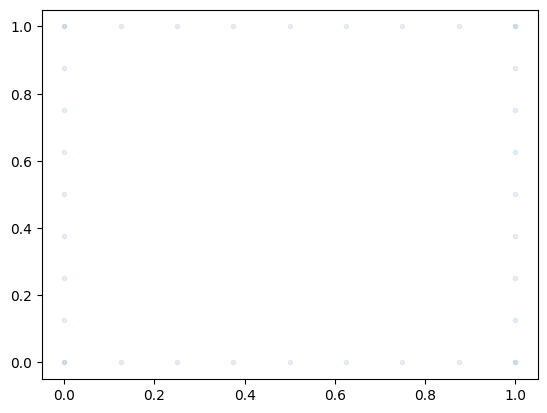

In [4]:
temp = x_bd[x_bd[:,0]==0,:]
print(temp.shape)
plt.plot(temp[:,1],temp[:,2],'.',alpha=0.1)
plt.show()

In [3]:
domain = Domain(domain_range=(0,1,0,1,0,1), domain_shape='box')
print(domain.domain_range)
sampler = qmc.Halton(d=3, scramble=True)
x_pde = domain.sample_domain_uniform(mesh_size=[1001,65,65])
x_test = domain.sample_domain_uniform(mesh_size=[1001,65,65])
x_bd = domain.sample_nd_mesh_bd(mesh_vec=[1001,65,65])
x_bd = domain.shift2range(x_bd)

x_ic = x_bd[4225:8450]
x_bd = x_bd[8450:]
print(x_pde.shape)
print(x_bd.shape)
print(x_ic.shape)
print(x_test.shape)

[[0 1]
 [0 1]
 [0 1]]


(4229225, 3)
(260260, 3)
(4225, 3)
(4229225, 3)


In [10]:
domain = Domain(domain_range=(0,1,0,1,0,1), domain_shape='box')
print(domain.domain_range)
sampler = qmc.Halton(d=3, scramble=True)
x_pde = domain.sample_domain_uniform(mesh_size=[1001,65,65])
x_test = domain.sample_domain_uniform(mesh_size=[1001,33,33])
x_bd = domain.sample_nd_mesh_bd(mesh_vec=[1001,65,65])
x_bd = domain.shift2range(x_bd)
x_ic = domain.sample_domain_uniform(mesh_size=[1001,65,65])
x_bd = x_bd[8450:]
print(x_pde.shape)
print(x_bd.shape)
print(x_ic.shape)
print(x_test.shape)

[[0 1]
 [0 1]
 [0 1]]


(4229225, 3)
(260260, 3)
(4229225, 3)
(1090089, 3)


In [11]:
my_prob = Heat_2d_Case1()
#x,u = my_prob.check_solution(x_pde)
# plot_2d_tri(x[:,0], x[:,1], u[:,0])

target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.boudary(x_bd)
target_ic = my_prob.initial(x_ic[:4225])

target_test = {}
heat_example = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-Case1/Heat-Case1.npy')
#heat_example_test = heat_example[:,::2,::2].transpose((0,2,1)).flatten()
heat_example_test = heat_example[:,::4,::4].transpose((0,2,1)).flatten()
target_test['u'] = heat_example_test.reshape(-1,1)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)
print(my_prob)

***************************************************
Heat_example (case=None):
	x_pde:   	(4229225, 3)
	x_bd:    	(260260, 3)
	x_ic:    	(4229225, 3)
	x_test:    	(1090089, 3)
***************************************************


In [12]:
np.savez('/root/radiation diffusion/TransNet/radiation diffusion/Heat-Case1/data-Heat-Case1-2.npz', x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
            target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)

In [4]:
my_prob = Heat_2d_Case2()
#x,u = my_prob.check_solution(x_pde)
# plot_2d_tri(x[:,0], x[:,1], u[:,0])

target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.boudary(x_bd)
target_ic = my_prob.initial(x_ic[:1089,:])

target_test = {}
heat_example = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-Case2/Heat-Case2.npy')
#heat_example_test = heat_example[:,::2,::2].transpose((0,2,1)).flatten()
heat_example_test = heat_example[:,::4,::4].transpose((0,2,1)).flatten()
target_test['u'] = heat_example_test.reshape(-1,1)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)
print(my_prob)

***************************************************
Heat_example (case=None):
	x_pde:   	(25025, 3)
	x_bd:    	(20020, 3)
	x_ic:    	(1090089, 3)
	x_test:    	(1090089, 3)
***************************************************


In [5]:
np.savez('/root/radiation diffusion/TransNet/radiation diffusion/Heat-Case2/data-Heat-Case2-2.npz', x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
            target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)

In [7]:
my_prob = Heat_Diffusion_1T(case='z3b1g2Dul')
#x,u = my_prob.check_solution(x_pde)
# plot_2d_tri(x[:,0], x[:,1], u[:,0])

target_pde = my_prob.rhs(x_pde)
target_ic = my_prob.initial(x_ic)

target_bd = []
l = int(len(x_bd) / 4)
target_bd_right = my_prob.boudary_others(x_bd[:l])
target_bd.append(target_bd_right)
target_bd_left = my_prob.boudary_left(x_bd[l:2*l])
target_bd.append(target_bd_left)
target_bd_top = my_prob.boudary_others(x_bd[2*l:3*l])
target_bd.append(target_bd_top)
target_bd_bottom = my_prob.boudary_others(x_bd[3*l:])
target_bd.append(target_bd_bottom)
target_bd = np.concatenate(target_bd, axis=0)

target_test = {}
heat_example = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/Heat-z3b1g2Dul.npy')
heat_example_test = heat_example[:,::2,::2].transpose((0,2,1)).flatten()
target_test['u'] = heat_example_test.reshape(-1,1)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)
print(my_prob)

***************************************************
Heat_diffusion_1T (case=z3b1g2Dul):
	x_pde:   	(4229225, 3)
	x_bd:    	(260260, 3)
	x_ic:    	(4225, 3)
	x_test:    	(4229225, 3)
***************************************************


In [8]:
np.savez('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/data-Heat-z3b1g2Dul-1.npz', x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
            target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)

In [4]:
my_prob = Heat_Diffusion_1T(case='z3b2g1Dul')
#x,u = my_prob.check_solution(x_pde)
# plot_2d_tri(x[:,0], x[:,1], u[:,0])

target_pde = my_prob.rhs(x_pde)
target_ic = my_prob.initial(x_ic)

target_bd = []
l = int(len(x_bd) / 4)
target_bd_right = my_prob.boudary_others(x_bd[:l])
target_bd.append(target_bd_right)
target_bd_left = my_prob.boudary_left(x_bd[l:2*l])
target_bd.append(target_bd_left)
target_bd_top = my_prob.boudary_others(x_bd[2*l:3*l])
target_bd.append(target_bd_top)
target_bd_bottom = my_prob.boudary_others(x_bd[3*l:])
target_bd.append(target_bd_bottom)
target_bd = np.concatenate(target_bd, axis=0)

target_test = {}
heat_example = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b2g1Dul/Heat-z3b2g1Dul.npy')
heat_example_test = heat_example[:,::2,::2].transpose((0,2,1)).flatten()
target_test['u'] = heat_example_test.reshape(-1,1)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)
print(my_prob)

***************************************************
Heat_diffusion_1T (case=z3b2g1Dul):
	x_pde:   	(4229225, 3)
	x_bd:    	(260260, 3)
	x_ic:    	(4225, 3)
	x_test:    	(4229225, 3)
***************************************************


In [7]:
np.savez('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b2g1Dul/data-Heat-z3b2g1Dul-1.npz', x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
            target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)

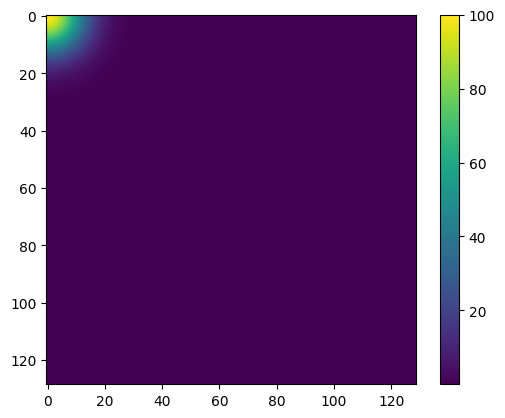

In [7]:
a = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/Heat-z3b1g2Dul.npy')
plt.imshow(a[0])
plt.colorbar()
plt.show()